Real Time face Detection Using DNN

In [66]:
import numpy as np
import cv2 

In [67]:
img=cv2.imread('./Model/faces.jpg')
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
face_detection_model=cv2.dnn.readNetFromCaffe('./Model/deploy.prototxt.txt','./Model/res10_300x300_ssd_iter_140000.caffemodel')

In [73]:
def face_detection_dnn(img):
    #step1-blob from image
    blob=cv2.dnn.blobFromImage(img,1,(300,300),(104,177,123),swapRB=True)

    #step2-set blob as input
    face_detection_model.setInput(blob)

    #step3-get the output
    detections=face_detection_model.forward()

    #step4-drawing bounding box out of the face detected
    image=img.copy()
    h,w=image.shape[:2]
    for i in range(0,detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>0.5:
            #diagonal points 3:7
            box=detections[0,0,i,3:7]*np.array([w,h,w,h])
            box=box.astype('int')
            p1=(box[0],box[1])
            p2=(box[2],box[3])
            #draw rectangle
            cv2.rectangle(image,p1,p2,(0,0,255),2)

            text='score: {:.0f} %'.format(confidence*100)
            cv2.putText(image,text,p1,cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(255,255,255),1)

    #cv2.imshow('image',image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    return image

In [74]:
img_detect=face_detection_dnn(img)
cv2.imshow('image',img_detect)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [75]:
cap=cv2.VideoCapture(0)

face_detection_model=cv2.dnn.readNetFromCaffe('./Model/deploy.prototxt.txt','./Model/res10_300x300_ssd_iter_140000.caffemodel')

while True:
    ret,frame=cap.read()
    
    if ret==False:
        break
        
    img_detection=face_detection_dnn(frame)
    
    cv2.imshow('Real Time Face Detection',img_detection)
    
    if cv2.waitKey(1)==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
    

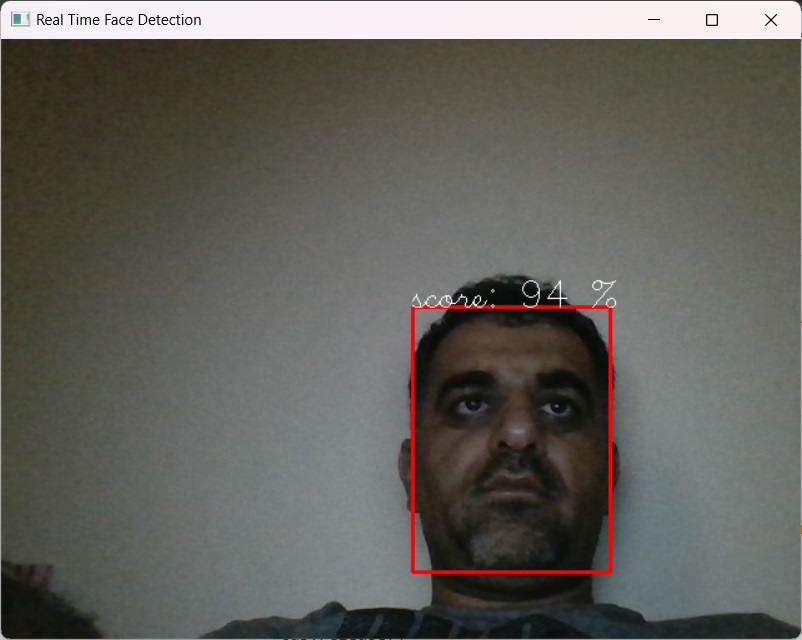